# Predicción de calificaciones
### Daniel Marín López
---
Usando este conjunto de datos que analiza el rendimiento de los estudiantes en la educación secundaria de dos escuelas portuguesas, vamos a realizar un modelo de regresión lineal que sea capaz de predecirla calificación final de un estudiante.

Como el modelo tiene bastantes entradas (30) solo vamos a usar estas: `["G1", "G2", "G3", "studytime", "failures", "absences"]`.

* `"G1"` representa las calificaciones del primer período, `"G2"` representa las calificaciones del segundo período y `"G3"` representa las calificaciones finales. Los valores son de 0 a 20 (discretos).
* `"studytime"` representa el tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas).
* "failures" representa número de fracasos en clases pasadas (numérico: n si 1<=n<3, de lo contrario 4).
* `"absences"` representa el número de ausencias escolares (numérico: de 0 a 93).

Fíjate que la variable objetivo (`G3`) no es continua, así que evaluaremos la bondad del modelo con un informe de clasificación.

OPCIONAL: Usa todas las columnas del dataset.

---

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
DATA = ["G1", "G2", "G3", "studytime", "failures", "absences"]
SEED = 42
TEST_SIZE = 0.2
FIG_SIZE = (10, 6)
FONT_SIZE = 14

Cargamos los datos

In [3]:
!wget 'https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv'

--2025-03-31 08:48:59--  https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/plain]
Saving to: ‘student-mat.csv’

student-mat.csv     100%[===================>]  41.00K  --.-KB/s    in 0.01s   

2025-03-31 08:48:59 (3.34 MB/s) - ‘student-mat.csv’ saved [41983/41983]



Escogemos las columnas deseadas.

In [4]:
calificaciones = pd.read_csv('student-mat.csv')
calificaciones = calificaciones[DATA]
calificaciones.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [5]:
calificaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   studytime  395 non-null    int64
 4   failures   395 non-null    int64
 5   absences   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


Visualizamos la matriz de correlación.

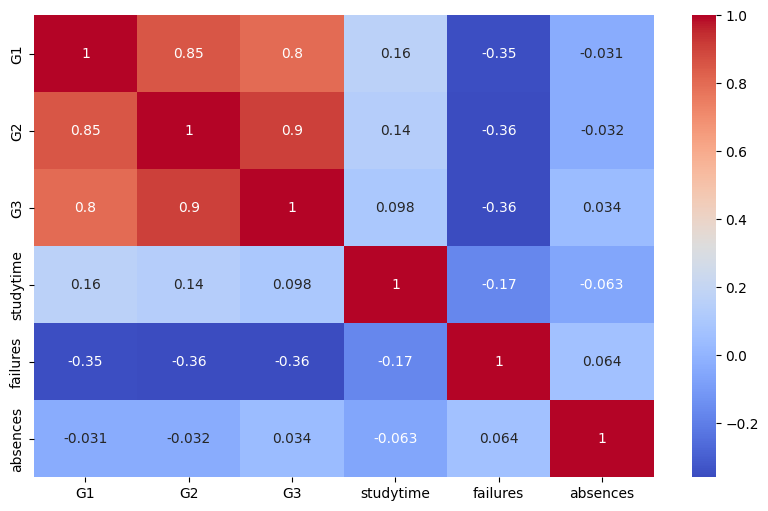

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(calificaciones.corr(), annot=True, cmap='coolwarm')
plt.show()

Podemos notar que las características G1 y G2 están muy relacionadas con el objetivo G3, lo cual es lógico ya que son las notas finales. Decidimos observar más en profundidad la variable objetivo.

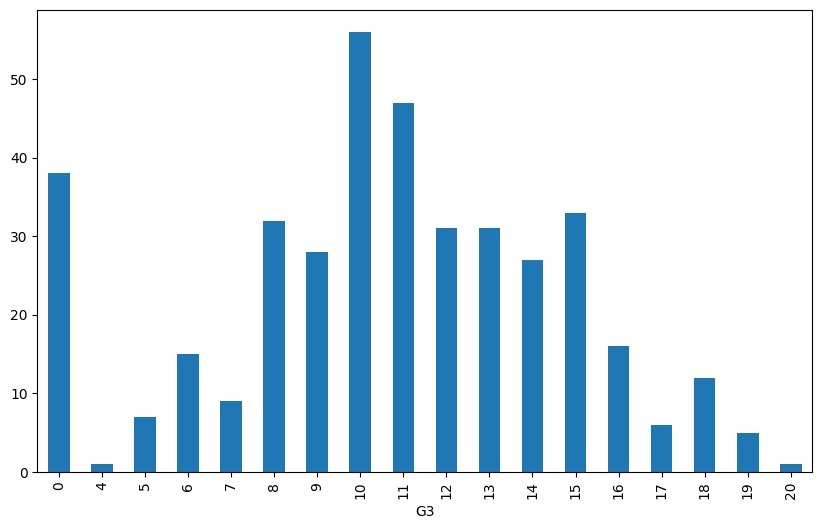

In [7]:
plt.figure(figsize=(10, 6))
calificaciones['G3'].value_counts().sort_index().plot(kind="bar")
plt.show()

Vemos que los datos no están balanceados, aunque siguen más o menos una distribución normal, podríamos balancear los datos pero intentaremos trabajar con ellos tal cual están ahora. Creamos los datos de entrenamiento y test.

In [8]:
X = calificaciones.drop('G3', axis=1)
y = calificaciones['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

Estandarizamos los datos.

In [9]:
cal_standar = StandardScaler()
X_train_scaled = cal_standar.fit_transform(X_train)
X_test_scaled = cal_standar.transform(X_test)

Creamos el modelo de regresión lineal.

In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred)
y_pred = y_pred.astype(int)
y_pred = np.clip(y_pred, 0, 20)

print(f"Score: {model.score(X_test_scaled, y_test)}")
print('-'*35)
print(classification_report(y_test, y_pred, zero_division=1))

Score: 0.7821754247320557
-----------------------------------
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       0.00      0.00      0.00         4
           6       0.14      0.17      0.15         6
           7       0.00      0.00      0.00         1
           8       0.33      0.50      0.40         6
           9       0.17      0.20      0.18         5
          10       0.29      0.18      0.22        11
          11       0.33      0.20      0.25         5
          12       0.25      0.20      0.22         5
          13       0.50      0.80      0.62         5
          14       0.50      0.50      0.50         6
          15       0.75      0.60      0.67        10
          16       0.50      0.50      0.50         4
          17       1.00      0.67      0.80         3
          18       

Vemos aquí dos cosas distintas:

* La score devuelta es de 0.78 mientras que su desempeño es de 0.33. Esto es debido a que la score es el $R^2$ que se usa en regresión mientras que el accuracy se usa para clasificación.
* Pueden aparecer características que no estaban antes, para solucionar esto usamos `np.clip` para que limite los valores entre 0 y 20.
* Además, usamos `zero_division=1` ya que hay algunas clases en los datos que no están presentes en los datos reales, para controlarlo ponemos que devuelva 1 en vez de que genere un error ya que al realizar el proceso de puntuación devuelve 0.

La solución a estos problemas sería usar un modelo de clasificación o que los datos no fueran demasiado complejos para la regresión lineal.

La matriz de confusión es la siguiente:

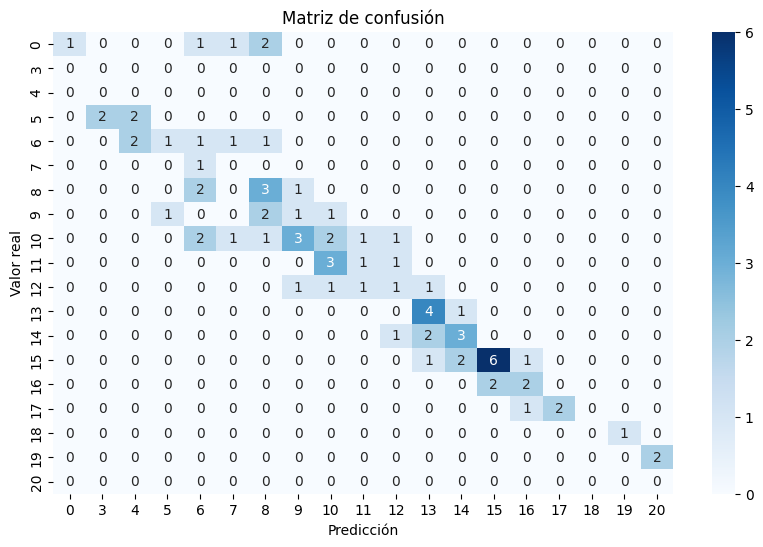

In [ ]:
cal_cm = Metrics.confusion_matrix(y_test, np.round(y_pred))
CLASSES = np.unique(np.concatenate((y_test, np.round(y_pred))))

plt.figure(figsize=FIG_SIZE)
sns.heatmap(cal_cm, annot=True, cmap='Blues', fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

Vemos que la matriz de confusión es bastante mala, fallando mucho los valores del test.